In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)
library(kmed)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
#cargar
df <- read.csv(file = '../../../../../dataframes/enigh/2016/df_transform_09.csv')
data <- df
head(data)

tam_loc,est_socio,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,⋯,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,mun
0.09607617,0.04148875,0.09873053,0.06560877,0.2820513,0.07184074,0.2000000,0.09090909,0.4285714,0.2,⋯,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0,2
0.09607617,0.04148875,0.01598384,0.06560877,0.8333333,0.07184074,0.0000000,0.09090909,0.0000000,0.0,⋯,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0,2
0.09607617,0.04148875,0.07362954,0.10000000,0.3333333,0.07184074,0.1333333,0.18181818,0.1428571,0.1,⋯,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0,2
0.09607617,0.04148875,0.01598384,0.06560877,0.3846154,0.09434507,0.0000000,0.09090909,0.0000000,0.0,⋯,0.000000000,0.00000000,0,0,0,0,0.0000000,0.000000000,0,2
0.09607617,0.04148875,0.01598384,0.06560877,0.7307692,0.09434507,0.0000000,0.09090909,0.0000000,0.0,⋯,0.000000000,0.00000000,0,0,0,0,0.2199293,0.000000000,0,2
0.09607617,0.04148875,0.09873053,0.06560877,0.5384615,0.02371610,0.4666667,0.18181818,0.8571429,0.6,⋯,0.009047614,0.02041893,0,0,0,0,0.0000000,0.008660727,0,2


In [3]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    #part = kmeans$cluster, 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

In [4]:
max(dunn_kmeans)

[1] 0.2763651

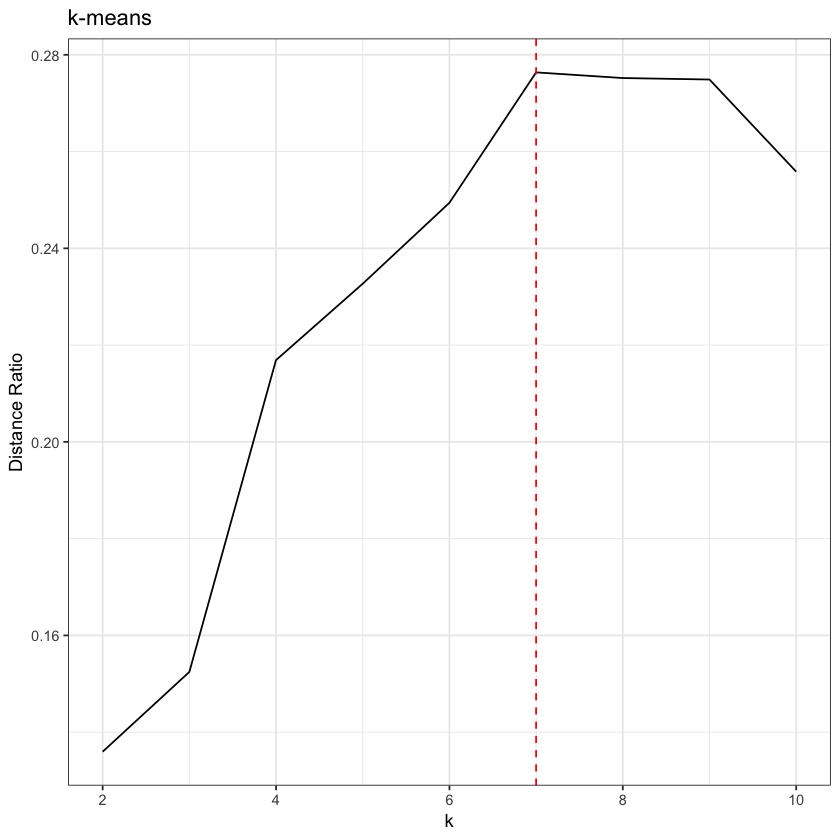

In [5]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

In [6]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

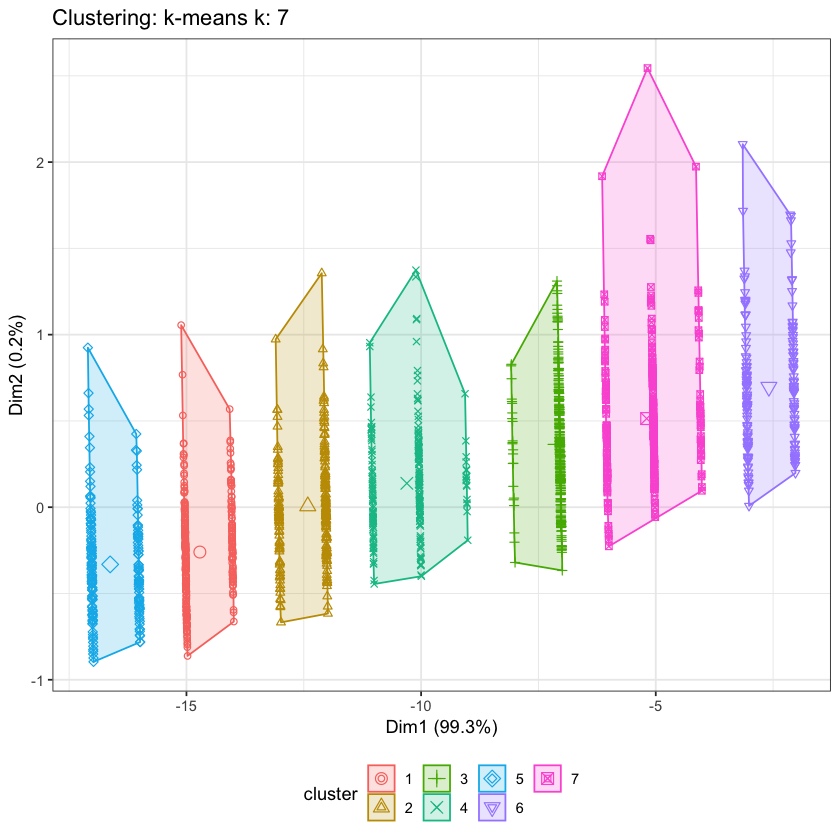

In [7]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans